# To predict the outcome of the harvest season:'crop damage'

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('C:/Users/HP/Downloads/agriculture.csv')
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [3]:
train.shape

(4599, 10)

In [4]:
train.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [6]:
#checking statistics
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [7]:
#checking null values
train.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

there are 442 missing values in number_weeks_used

In [8]:
#checking unique values
train.nunique()

ID                         4599
Estimated_Insects_Count      71
Crop_Type                     2
Soil_Type                     2
Pesticide_Use_Category        3
Number_Doses_Week            20
Number_Weeks_Used            63
Number_Weeks_Quit            47
Season                        3
Crop_Damage                   3
dtype: int64

In [9]:
#treating with null values
train['Number_Weeks_Used'].fillna(train['Number_Weeks_Used'].mean(),inplace=True)

In [10]:
#again ckecking null values
train.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

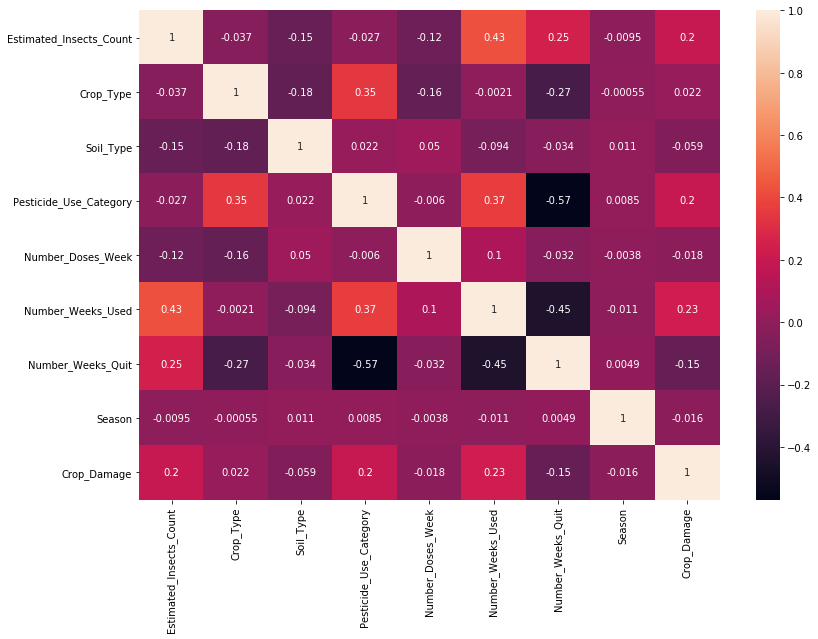

In [11]:
#checking correlation
plt.figure(figsize=(13,9))
sns.heatmap(train.corr(),annot=True)

soil_type,number_doses_week,number_weeks_quit are negatively correlated with crop damage

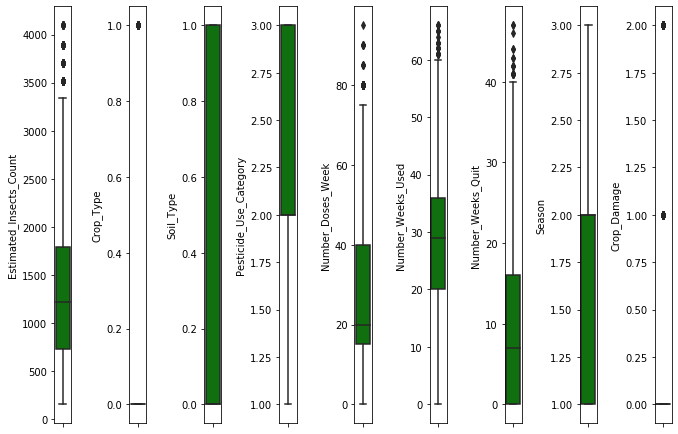

In [12]:
#checking outliers
collist=train.columns.values
ncol=12
nrows=10
collist
plt.figure(figsize=(ncol, 5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(train[collist[i]],color='green',orient='v')
    plt.tight_layout()
    

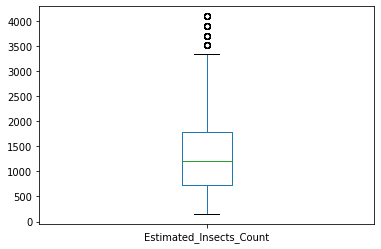

In [13]:
train['Estimated_Insects_Count'].plot.box()

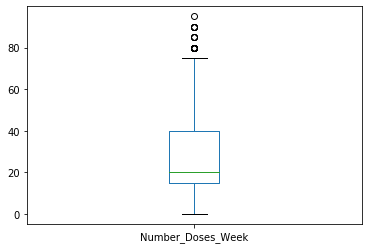

In [14]:
train['Number_Doses_Week'].plot.box()

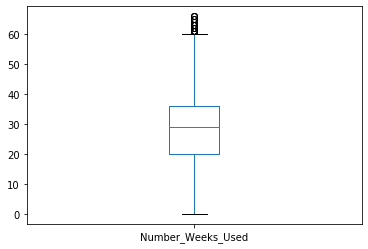

In [15]:
train['Number_Weeks_Used'].plot.box()

In [16]:
#checking skewness
train.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.278664
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

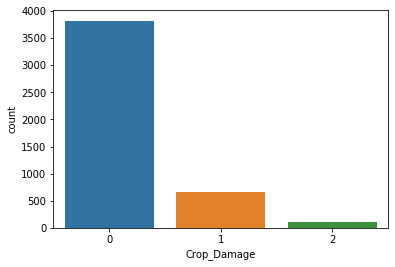

In [17]:
#data visualization
sns.countplot('Crop_Damage',data=train)
train['Crop_Damage'].value_counts()

0    3565
1    1034
Name: Crop_Type, dtype: int64

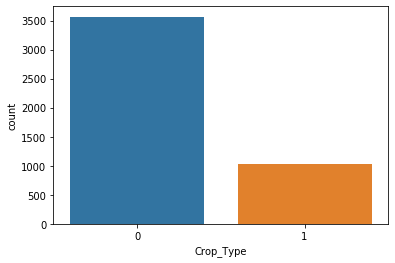

In [18]:
sns.countplot('Crop_Type',data=train)
train['Crop_Type'].value_counts()


Crop_Type  Crop_Damage
0          0              2979
           1               498
           2                88
1          0               841
           1               166
           2                27
Name: Crop_Damage, dtype: int64


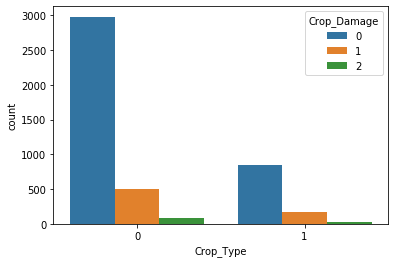

In [19]:
sns.countplot('Crop_Type',data=train,hue='Crop_Damage')
print(train.groupby('Crop_Type')['Crop_Damage'].value_counts())

crop alive is more in type 0 crop type

Season  Crop_Damage
1       0              1150
        1               192
        2                37
2       0              1908
        1               358
        2                61
3       0               762
        1               114
        2                17
Name: Crop_Damage, dtype: int64


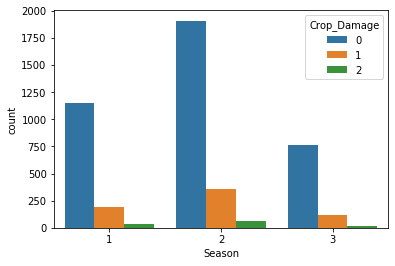

In [20]:
sns.countplot('Season',data=train,hue='Crop_Damage')
print(train.groupby('Season')['Crop_Damage'].value_counts())

In season 2 crop alive chances are more followed by season 1 then season 3

Pesticide_Use_Category  Crop_Damage
1                       1                33
                        0                 7
                        2                 5
2                       0              2881
                        1               290
                        2                34
3                       0               932
                        1               341
                        2                76
Name: Crop_Damage, dtype: int64


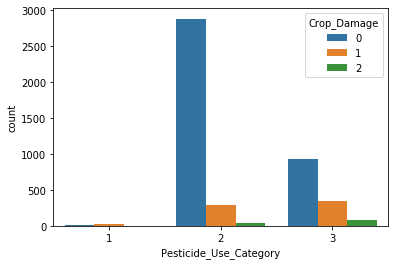

In [21]:
sns.countplot('Pesticide_Use_Category',data=train,hue='Crop_Damage')
print(train.groupby('Pesticide_Use_Category')['Crop_Damage'].value_counts())

If the Pesticide_Use_Category is of 2 then crop alive chances are more followed by type 3

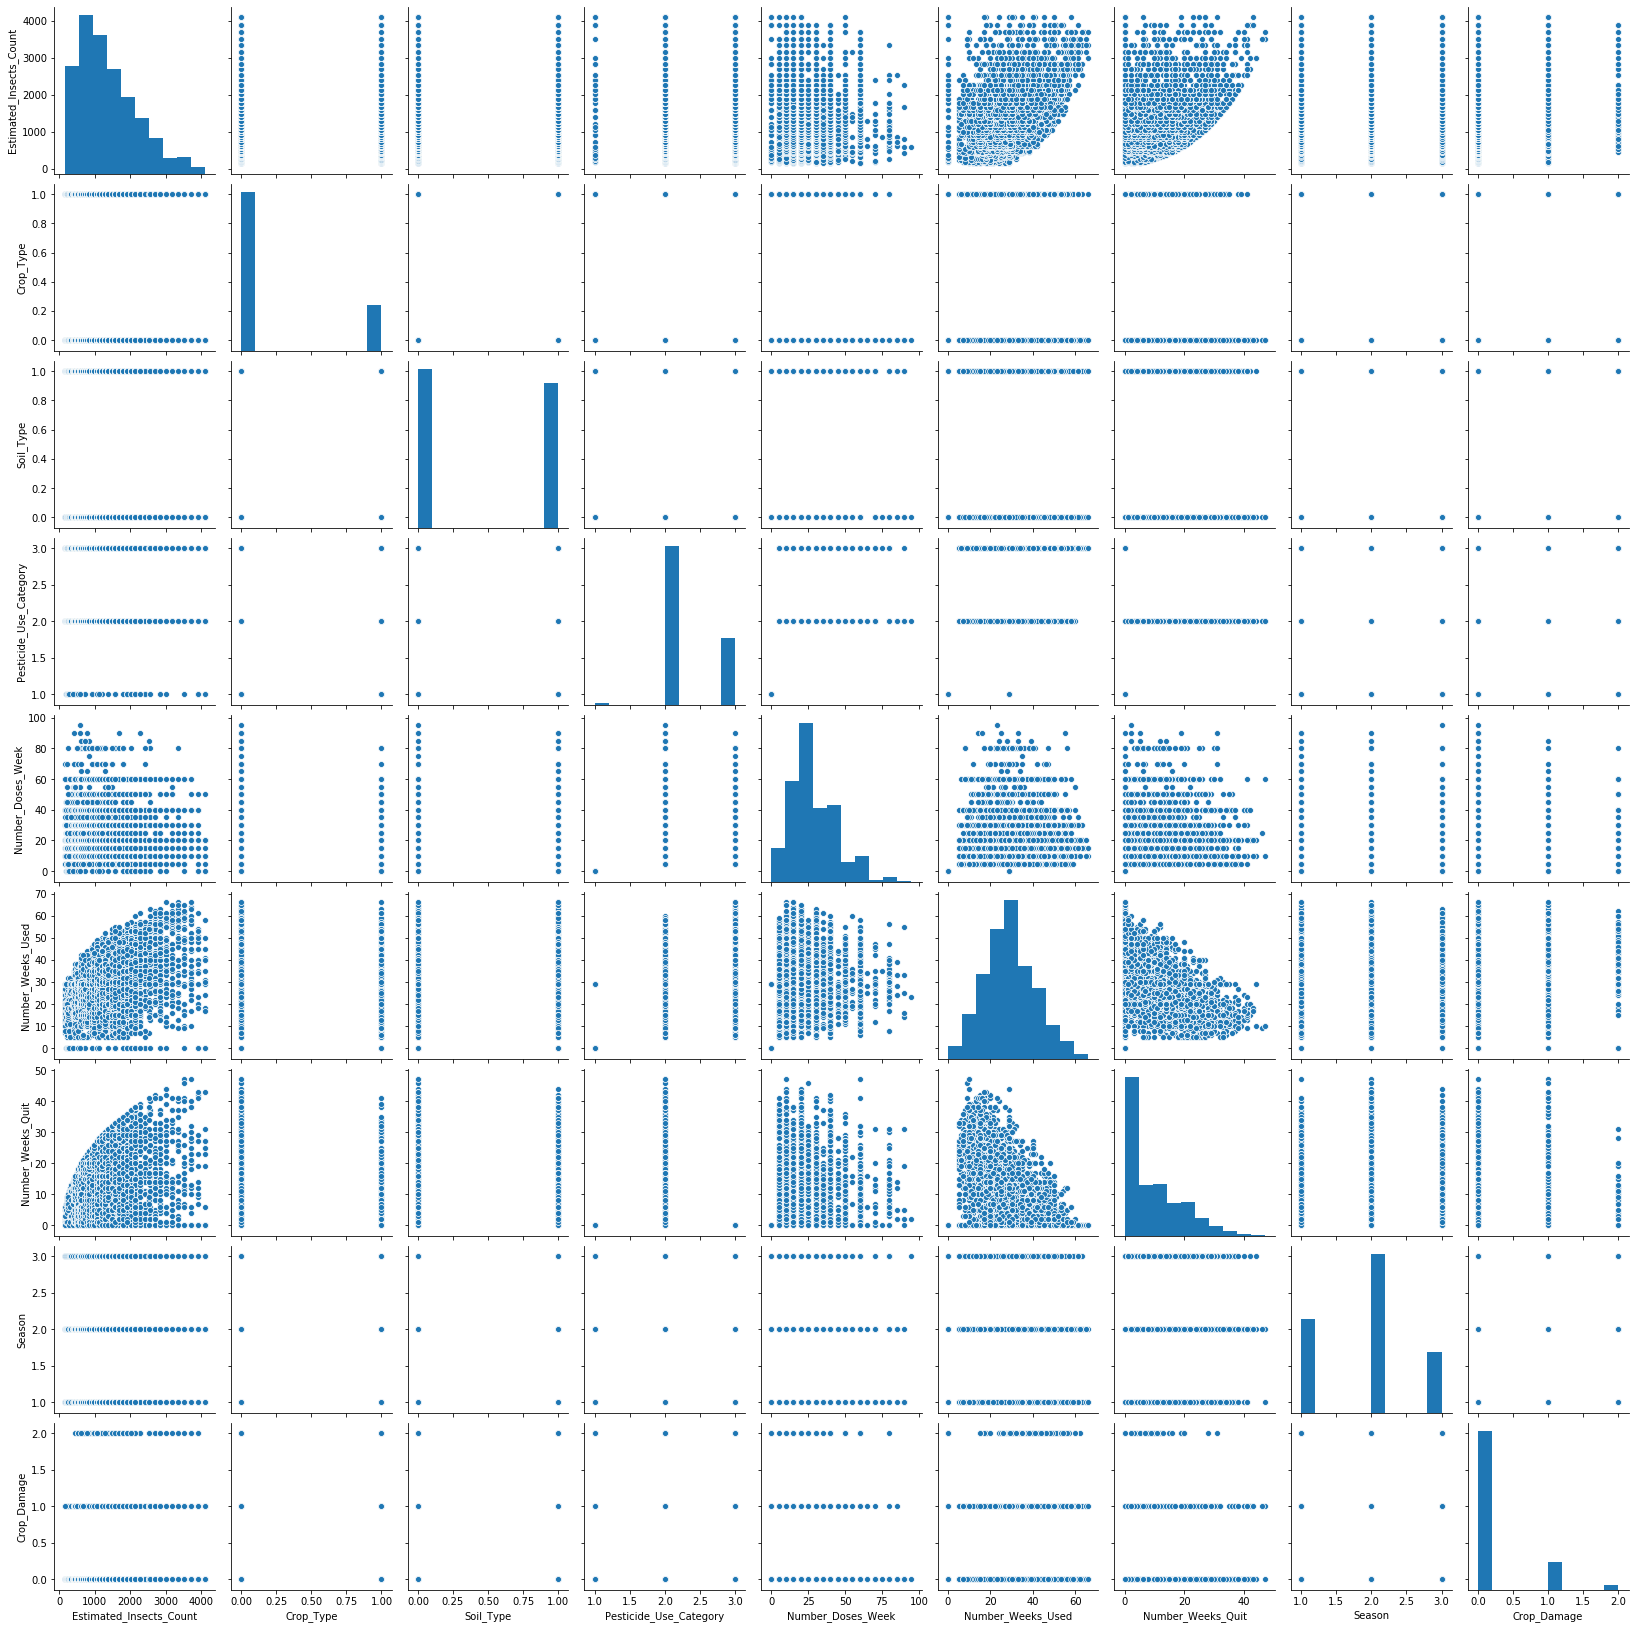

In [22]:
sns.pairplot(train)

In [23]:
#dropping ID column for further processing
train.drop('ID',axis=1,inplace=True)


# Test Set

Here we are doing separate processing for train and test data to avoid data leakage

In [24]:
test=pd.read_excel('C:/USERS/HP/Downloads/test_agriculture.xlsx')

In [25]:
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [26]:
#checking the shape of test data
test.shape

(1199, 9)

In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1199 non-null   object 
 1   Estimated_Insects_Count  1199 non-null   int64  
 2   Crop_Type                1199 non-null   int64  
 3   Soil_Type                1199 non-null   int64  
 4   Pesticide_Use_Category   1199 non-null   int64  
 5   Number_Doses_Week        1199 non-null   int64  
 6   Number_Weeks_Used        1080 non-null   float64
 7   Number_Weeks_Quit        1199 non-null   int64  
 8   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 84.4+ KB


In [28]:
#describing statistics
test.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1080.000000,1199.000000,1199.000000
mean,1288.737281,0.194329,0.455379,2.383653,26.555463,29.033333,7.052544,1.881568
std,845.004912,0.395848,0.498213,0.522866,16.154101,12.782083,8.863634,0.685640
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,677.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1056.000000,0.000000,0.000000,2.000000,20.000000,28.000000,3.000000,2.000000
75%,1785.000000,0.000000,1.000000,3.000000,40.000000,38.000000,13.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,90.000000,64.000000,42.000000,3.000000


In [29]:
#checking null values
test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

there are 119 null values are present in Number_Weeks_Used column

In [30]:
#treating with null values
test['Number_Weeks_Used'].fillna(test['Number_Weeks_Used'].mean(),inplace=True)

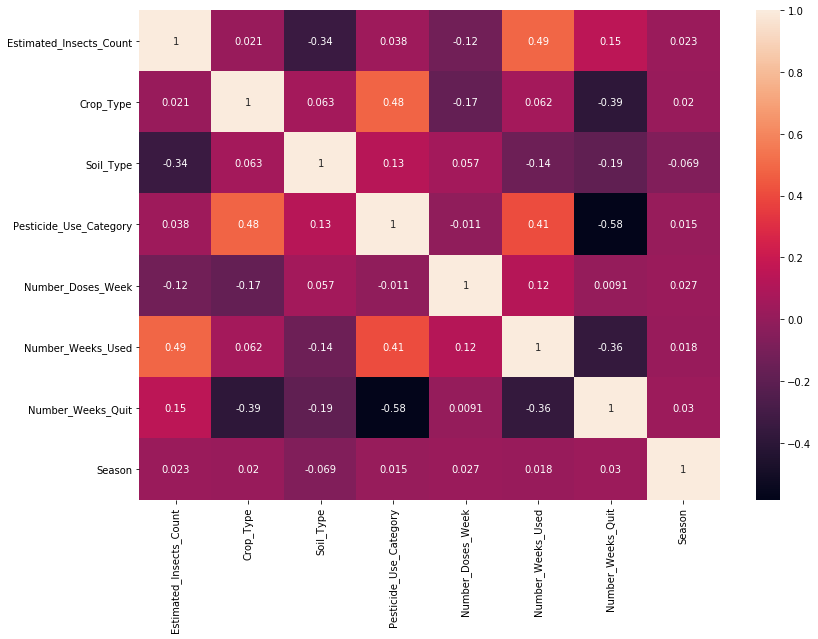

In [31]:
#checking correlation
plt.figure(figsize=(13,9))
sns.heatmap(test.corr(),annot=True)

data is not so correlated with each other

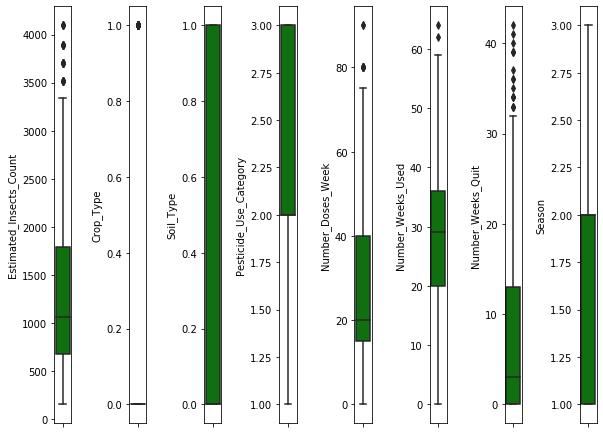

In [32]:
#checking outliers
collist=test.columns.values
ncol=12
nrows=10
collist
plt.figure(figsize=(ncol, 5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(test[collist[i]],color='green',orient='v')
    plt.tight_layout()
    

In [33]:
#checking skewness
test.skew()

Estimated_Insects_Count    1.098665
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week          0.872028
Number_Weeks_Used          0.220343
Number_Weeks_Quit          1.191013
Season                     0.155872
dtype: float64

In [34]:
#preparing the data
x=train.iloc[:,:-1]
y=train['Crop_Damage'].values
print(x.shape)
print(y.shape)

(4599, 8)
(4599,)


In [35]:
# Model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
#lets split the data for modeling
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42,shuffle=True)

In [36]:
#scaling the data
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [37]:
# Checking scores for different models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
model=[SVC(), DecisionTreeClassifier(),KNeighborsClassifier()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
0.8304347826086956
[[756   1   0]
 [132   8   0]
 [ 22   1   0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       757
           1       0.80      0.06      0.11       140
           2       0.00      0.00      0.00        23

    accuracy                           0.83       920
   macro avg       0.54      0.35      0.34       920
weighted avg       0.81      0.83      0.76       920



accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_sample

among three svc model is working good so lets cross validate svc 

In [38]:
#cross validation for random forest
from sklearn.model_selection import cross_val_score
svcscores=cross_val_score(SVC(),x,y,cv=5)
print(svcscores)
print(svcscores.mean())

[0.83043478 0.83043478 0.83043478 0.83043478 0.83133841]
0.8306155083502862


Lets choose best parameters using GridSearchCV

In [39]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
#defining parameters
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}
clf=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
clf.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.833, total=   0.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.833, total=   0.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.833, total=   0.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.832, total=   0.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.833, total=   0.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.833, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.833, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.833, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.832, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  8.1min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [40]:
print(clf.best_params_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [41]:
svc=SVC(kernel='rbf',C=10,gamma=0.01)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print(accuracy_score(y_test,pred))

0.8304347826086956


from above getting maximum score of 83.04% using SVC model

ENSEMBLE TECHNIQUES

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_predr=rfc.predict(x_test)
print('Accuracy score',accuracy_score(y_test,y_predr))
print('confusion_matrix',confusion_matrix(y_test,y_predr))
print('classification_report',classification_report(y_test,y_predr))

Accuracy score 0.8304347826086956
confusion_matrix [[732  23   2]
 [108  32   0]
 [ 19   4   0]]
classification_report               precision    recall  f1-score   support

           0       0.85      0.97      0.91       757
           1       0.54      0.23      0.32       140
           2       0.00      0.00      0.00        23

    accuracy                           0.83       920
   macro avg       0.46      0.40      0.41       920
weighted avg       0.78      0.83      0.79       920



In [43]:
#cross validation for random forest
from sklearn.model_selection import cross_val_score
rfcscores=cross_val_score(rfc,x,y,cv=5)
print(rfcscores)
print(rfcscores.mean())

[0.77826087 0.82065217 0.82282609 0.8        0.82154516]
0.8086568576429956


In [44]:
from sklearn.ensemble import AdaBoostClassifier   
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))


0.8293478260869566
[[751   6   0]
 [128  12   0]
 [ 19   4   0]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       757
           1       0.55      0.09      0.15       140
           2       0.00      0.00      0.00        23

    accuracy                           0.83       920
   macro avg       0.46      0.36      0.35       920
weighted avg       0.77      0.83      0.77       920



Using ensemble techniques also we are getting less score
lets save SVC model for good fit

In [45]:
#saving a model
from sklearn.externals import joblib
joblib.dump(svc,'crop_damage.pkl')

['crop_damage.pkl']

In [46]:
df1=pd.DataFrame(pred)
df1.to_csv("crop_damage.csv")